In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [2]:
act5 = np.array([
    [0.8350805610438197, 0.838495902146688, 0.803152365449829, 0.7856622969349027, 0.814422639128172],
    [0.9517962988774804, 0.9518393812420891, 0.9581931136316597, 0.956335150220943, 0.9448948598167987],
    [0.8807539404849074, 0.8792590845645634, 0.9232934429355636, 0.900414069860344, 0.9397354491757375],
    [0.9154779231159831, 0.9146812264497125, 0.93779737505887, 0.934765007344993, 0.9506732321597843],
    [0.9292779361719177, 0.8577134960978716, 0.8985500960117273,  0.9107903718795803, 0.8671812381051174],
    [0.8263917877219774, 0.8594784436786143, 0.8117687296551476, 0.8059632363382304, 0.8300138712738805],
    [0.8350208390737766, 0.8562649174254738, 0.9107500017199922, 0.8393975378927658, 0.8123091314876991]
])

combs = ('MagGyro',  'MagAccl', 'MagBoth_1D', 'MagBoth_2D', '3AxesGyro','3AxesAccl', '3AxesBoth')

In [3]:
id5 = np.array([
    [0.8661, 0.8377, 0.8521, 0.8618, 0.8522],
    [0.8633, 0.8761,  0.8777, 0.8715,  0.8676],
    [0.9114, 0.9242, 0.9339, 0.9332, 0.9262],
    [0.9444, 0.9601, 0.9516, 0.9554, 0.9535],
    [0.9424, 0.9445, 0.9246, 0.9325, 0.9325],
    [0.9198, 0.9296, 0.9244,  0.924, 0.9255],
    [0.9325, 0.929, 0.9292, 0.9188, 0.9418],
])

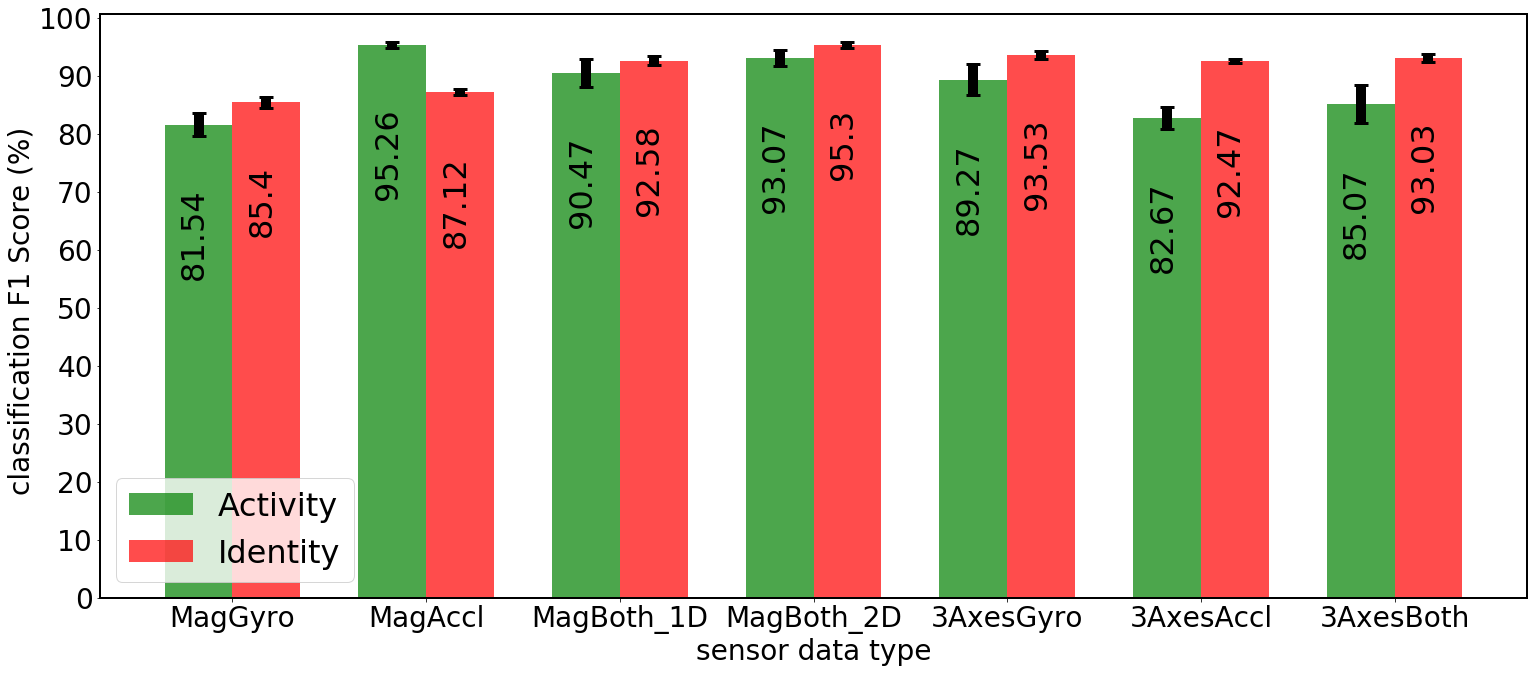

In [4]:
plt.rcParams['figure.figsize'] = (22,10)
plt.rcParams['font.size'] = 28
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2

n_groups = 7

act_f1 = act5.mean(axis=1)*100
act_std = act5.std(axis=1)*100

id_f1 = id5.mean(axis=1)*100
id_std = id5.std(axis=1)*100

combs = ('MagGyro',  'MagAccl', 'MagBoth_1D', 'MagBoth_2D', '3AxesGyro','3AxesAccl', '3AxesBoth')
error_config =dict(lw=10, capsize=7, capthick=3)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
rects1 = ax.bar(index, act_f1, bar_width,
                alpha=.7, color='g',
                yerr=act_std,
                error_kw=error_config,
                label='Activity')

rects2 = ax.bar(index + bar_width, id_f1, bar_width,
                alpha=.7, color='r',
                yerr=id_std,
                error_kw=error_config,
                label='Identity')

ax.set_xlabel('sensor data type', fontsize=28)
ax.set_ylabel('classification F1 Score (%) ', fontsize=28)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combs)
ax.legend(loc= "lower left",fontsize=32)
#plt.axhline(y = 96.26, linewidth=2, color='k', linestyle='--')
plt.yticks(np.arange(0,101,10))
fig.tight_layout()
k=0
for k in range(7):
    plt.annotate(""+str(act_f1[k].round(2)), xy=(1, 1), rotation = "vertical", xytext=(k-.1, act_f1[k]-15), fontsize=32)
    plt.annotate(""+str(id_f1[k].round(2)), xy=(1, 1), rotation = "vertical", xytext=(k+.25, id_f1[k]-15), fontsize=32)


In [5]:
samples = {50: [0.9437357622680602,  0.9269825155023431],
           45: [0.9115457397973644, 0.9234928758231943],
           40: [0.9149528499781788, 0.9093683070554555],
           35: [0.9209086518048157, 0.91596956924969],
           30: [0.9360753836586639, 0.9311111765652239],
           25: [0.9560311043695089, 0.92375520735912],
           20: [0.9175323455727964, 0.9039122146979531],
           15: [0.9229514471239573, 0.9090178543158732],
           10: [0.9150672983746342, 0.8614083439004313],
           5: [0.8930416441051504,  0.6340079895840439],
         }
smpl = np.array([[k, v[0]*100,v[1]*100] for k, v in samples.items()])
smpl    

array([[50.        , 94.37357623, 92.69825155],
       [45.        , 91.15457398, 92.34928758],
       [40.        , 91.495285  , 90.93683071],
       [35.        , 92.09086518, 91.59695692],
       [30.        , 93.60753837, 93.11111766],
       [25.        , 95.60311044, 92.37552074],
       [20.        , 91.75323456, 90.39122147],
       [15.        , 92.29514471, 90.90178543],
       [10.        , 91.50672984, 86.14083439],
       [ 5.        , 89.30416441, 63.40079896]])

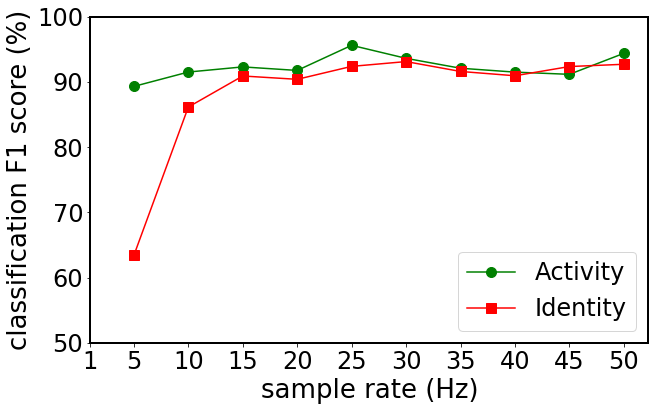

In [6]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 2
plt.plot(smpl[:,0], smpl[:,1], 'go-', label='Activity',markersize=10)
plt.plot(smpl[:,0], smpl[:,2], 'rs-', label='Identity',markersize=10)
plt.xlabel('sample rate (Hz)',fontsize=26)
plt.ylabel('classification F1 score (%)',fontsize=26)
plt.yticks(np.arange(50,101,10))
plt.xticks(np.append(1, np.arange(5,51,5)))
plt.legend(loc="lower right")

In [7]:
samples = {1: [0.8373007840593577,  0.8279729812962838],
           2: [0.8978451800692291, 0.8788185662593486],
           3: [0.9252915369606807, 0.9011224131632366],
           4: [0.9204775768242357, 0.9060514528886765],
           5: [0.8852093691416925, 0.9131232100931586],
           6: [0.9331388109011232, 0.9383943135784875],
           7: [0.9356751465372335, 0.9345153899396502],
           8: [0.9087758205570757, 0.9103742050946199],
           9: [0.9059269484286512, 0.9112390417002011],
           10: [0.9448430171859529,  0.9153658253091729],
         }
smpl = np.array([[k, v[0]*100,v[1]*100] for k, v in samples.items()])
smpl    

array([[ 1.        , 83.73007841, 82.79729813],
       [ 2.        , 89.78451801, 87.88185663],
       [ 3.        , 92.5291537 , 90.11224132],
       [ 4.        , 92.04775768, 90.60514529],
       [ 5.        , 88.52093691, 91.31232101],
       [ 6.        , 93.31388109, 93.83943136],
       [ 7.        , 93.56751465, 93.45153899],
       [ 8.        , 90.87758206, 91.03742051],
       [ 9.        , 90.59269484, 91.12390417],
       [10.        , 94.48430172, 91.53658253]])

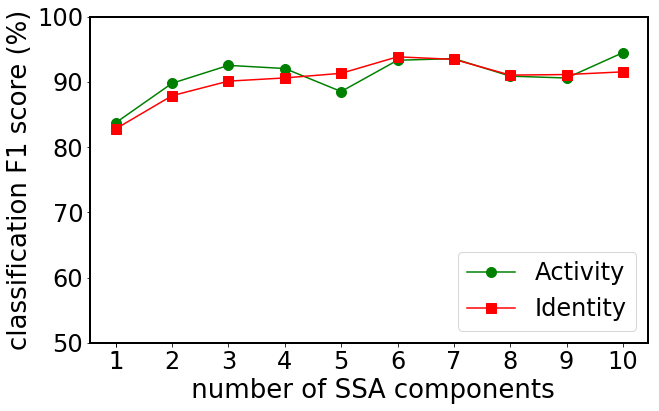

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 2
plt.plot(smpl[:,0], smpl[:,1], 'go-', label='Activity',markersize=10)
plt.plot(smpl[:,0], smpl[:,2], 'rs-', label='Identity',markersize=10)
plt.xlabel(' number of SSA components',fontsize=26)
plt.ylabel('classification F1 score (%)',fontsize=26)
plt.yticks(np.arange(50,101,10))
plt.xticks(np.append(1, np.arange(1,11,1)))
plt.legend(loc="lower right")